In [ ]:
! sudo apt-get install texlive-latex-recommended 
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended  
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip 
! unzip type1cm.zip -d /tmp/type1cm 
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm 
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm 
! sudo texhash 
!apt install cm-super
! sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super
! sudo apt-get install texlive-fonts-extra

In [1]:
import math

import matplotlib as mpl
#mpl.rcParams['text.usetex'] = True 
#mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\RequirePackage[libertine]{newtxmath}'] 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import cm

import matplotlib.pyplot as plt
from matplotlib import rc
from cycler import cycler

mpl.rcParams['ps.usedistiller'] = 'xpdf' 

plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

monochrome=(cycler('color', sns.color_palette("husl", 8))*2+(cycler('marker', ['v', 's', "o"])*7)[0:16])
plt.rc('axes', prop_cycle=monochrome)

pd.options.display.max_rows = 999

Setting rcParams['ps.usedistiller'] requires ghostscript.


In [2]:
purples5 = sns.color_palette("Purples_r", 5)
blues5 = sns.color_palette("Blues_r", 5)
reds5 = sns.color_palette("Reds_r", 5)

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
masterdata = pd.read_csv("/content/gdrive/MyDrive/GMCDE/experiments/mcdepaper/Cor12Iteration/2021-12-10-14-18_Cor12Iteration_scala/Cor12Iteration_scala.csv")

In [5]:
masterdata.head()

,genId,rep,first,second
0,independent-i-2-0.0-gaussian-0,1,0.870636,0.097757
1,independent-i-2-0.0-gaussian-0,3751,0.708288,0.334601
2,independent-i-2-0.0-gaussian-0,1251,0.742568,0.904532
3,independent-i-2-0.0-gaussian-0,938,0.281621,0.491506
4,independent-i-2-0.0-gaussian-0,6251,0.387872,0.540458


In [6]:
len(masterdata["rep"].unique())

10000

In [7]:
masterdata["genId"].unique()

array(['independent-i-2-0.0-gaussian-0', 'linear-l-2-0.4-gaussian-0',
       'hypercube-hc-2-0.4-gaussian-0',
       'independent_linear_stripe-ils-2-0.4-gaussian-0'], dtype=object)

In [8]:
obs_num = 1000

In [9]:
def get_first_iteration(genId: str):
  return (masterdata[(masterdata["genId"] == genId)]["first"]).to_numpy()

def get_second_iteration(genId: str):
  return (masterdata[(masterdata["genId"] == genId)]["second"]).to_numpy()

In [10]:
def plot_hist_distribution(data, title):
  plt.hist(data, bins=20, range=(0,1), density=True, stacked = True, 
                color=blues5[1], alpha=1, linewidth=1, edgecolor="grey")
  plt.xlim((-0.02,1.02))
  plt.title(title, fontsize =15)
  plt.tight_layout()

In [11]:
def plot_first_second_iteration_hist_distribution(genId:str):
  fig, axarr = plt.subplots(1,2, figsize=(14,4), sharex=True)
  axes = axarr.flatten()
  plt.sca(axes[0])
  first = get_first_iteration(genId)
  plot_hist_distribution(first,  f"1st iteration frequency distribution")
  plt.sca(axes[1])
  second = get_second_iteration(genId)
  plot_hist_distribution(second, f"2nd iteration frequency distribution")
  fig.suptitle(f'{genId}, {len(masterdata["rep"].unique())} samples, each {obs_num} observations', fontsize=16, y = 1.05)

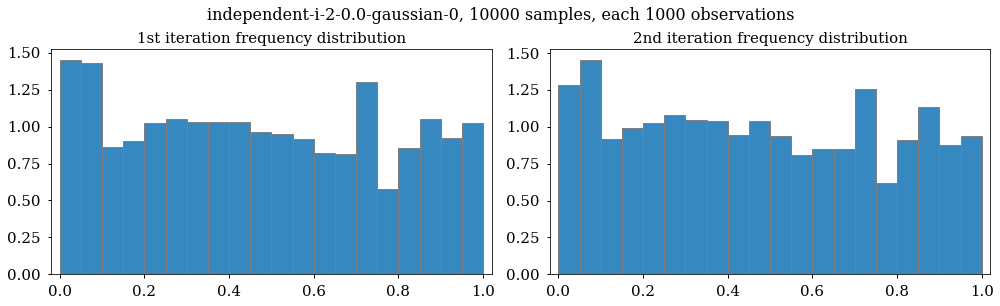

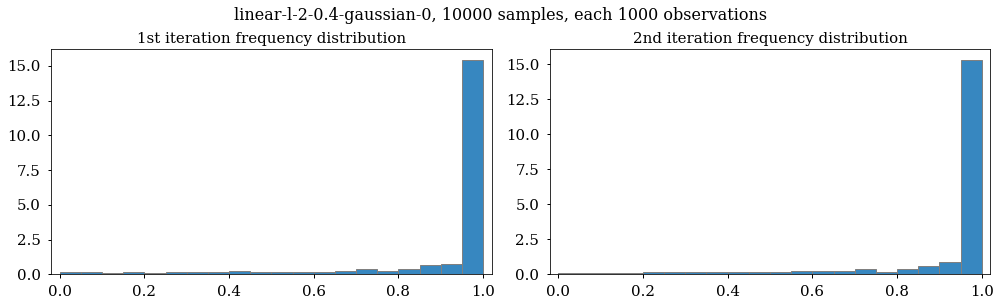

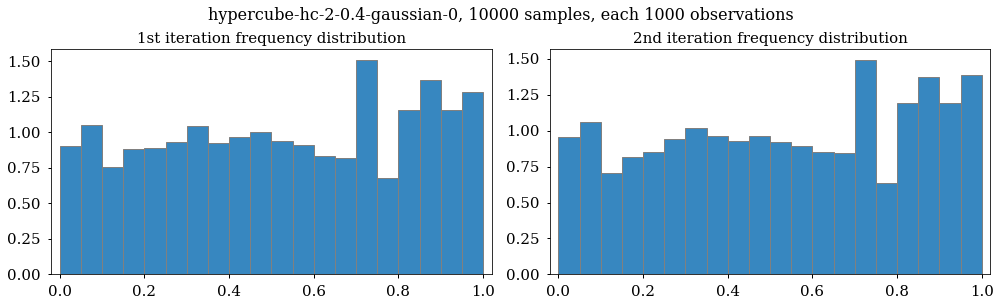

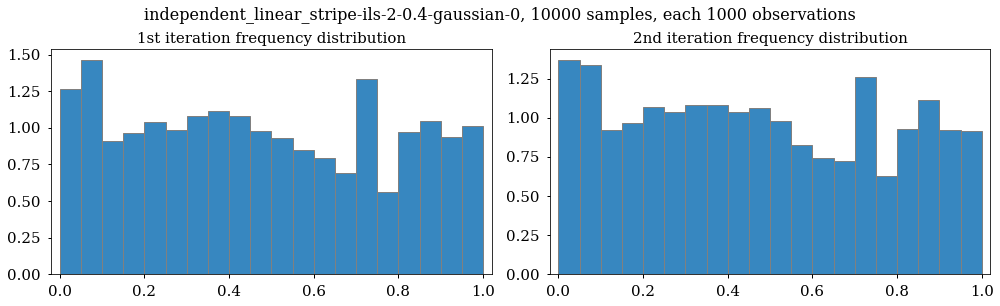

In [12]:
for genId in masterdata["genId"].unique():
  plot_first_second_iteration_hist_distribution(genId)

In [13]:
# this is a function from stackoverflow
def hist_3d_joint_distribution(data_dim1, data_dim2, genId):
  xAmplitudes = data_dim1
  yAmplitudes = data_dim2

  x = np.array(xAmplitudes)   #turn x,y data into numpy arrays
  y = np.array(yAmplitudes)


  fig = plt.figure(figsize=(8, 8))          #create a canvas, tell matplotlib it's 3d
  ax = fig.add_subplot(111, projection='3d')



  #make histogram stuff - set bins - I choose 20x20 because I have a lot of data
  hist, xedges, yedges = np.histogram2d(x, y, bins=(20,20))
  xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

  xpos = xpos.flatten()/2.
  ypos = ypos.flatten()/2.
  zpos = np.zeros_like (xpos)

  dx = xedges [1] - xedges [0]
  dy = yedges [1] - yedges [0]
  dz = hist.flatten()

  cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
  max_height = np.max(dz)   # get range of colorbars so we can normalize
  min_height = np.min(dz)
  # scale each z to [0,1], and get their rgb values
  rgba = [cmap((k-min_height)/max_height) for k in dz] 

  ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
  plt.title(f'First 2 iterations joint frequency distribution \n {genId}, {len(masterdata["rep"].unique())} samples, each {obs_num} observations', fontsize = 16)
  plt.xlabel("1st iteration", labelpad = 10, fontsize = 15)
  plt.ylabel("2nd iteration", labelpad = 10, fontsize = 15)
  #plt.savefig("First 2 MC iteration joint distribution \n from the 1000 2d independent observations")

In [14]:
def test_if_first_second_correlated(genId:str):
  bins = (20,20)

  first = get_first_iteration(genId)
  second = get_second_iteration(genId)
  x = first
  y = second


  # fig, axarr = plt.subplots(1,2, figsize=(14,4), sharex=True)

  fig = plt.figure(figsize=(16, 7))          #create a canvas, tell matplotlib it's 3d
  ax = fig.add_subplot(121, projection='3d')

  #make histogram stuff - set bins - I choose 20x20 because I have a lot of data
  hist, xedges, yedges = np.histogram2d(x, y, bins=bins)
  xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

  xpos = xpos.flatten()/2.
  ypos = ypos.flatten()/2.
  zpos = np.zeros_like (xpos)

  dx = xedges [1] - xedges [0]
  dy = yedges [1] - yedges [0]
  dz = hist.flatten()

  cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
  max_height = np.max(dz)   # get range of colorbars so we can normalize
  min_height = np.min(dz)
  # scale each z to [0,1], and get their rgb values
  rgba = [cmap((k-min_height)/max_height) for k in dz] 

  ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
  plt.title(f'Observed', fontsize = 18)
  plt.xlabel("1st iteration", labelpad = 10, fontsize = 15)
  plt.ylabel("2nd iteration", labelpad = 10, fontsize = 15)
  #plt.savefig("First 2 MC iteration joint distribution \n from the 1000 2d independent observations")


  ########### second
  x = np.random.choice(first, size=1000000)
  y = np.random.choice(first, size=1000000)

  ax = fig.add_subplot(122, projection='3d')

  #make histogram stuff - set bins - I choose 20x20 because I have a lot of data
  hist, xedges, yedges = np.histogram2d(x, y, bins=bins)
  xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

  xpos = xpos.flatten()/2.
  ypos = ypos.flatten()/2.
  zpos = np.zeros_like (xpos)

  dx = xedges [1] - xedges [0]
  dy = yedges [1] - yedges [0]
  dz = hist.flatten()

  cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
  max_height = np.max(dz)   # get range of colorbars so we can normalize
  min_height = np.min(dz)
  # scale each z to [0,1], and get their rgb values
  rgba = [cmap((k-min_height)/max_height) for k in dz] 

  ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
  plt.title(f'Under independence assumption', fontsize = 18)
  plt.xlabel("1st iteration", labelpad = 10, fontsize = 15)
  plt.ylabel("2nd iteration", labelpad = 10, fontsize = 15)
  fig.suptitle(f'First 2 iterations joint frequency distribution \n {genId}, {len(masterdata["rep"].unique())} samples, each {obs_num} observations', fontsize=20, y = 1.0)
  #plt.savefig("First 2 iteration joint distribution \n from the 1000 2d independent observations")

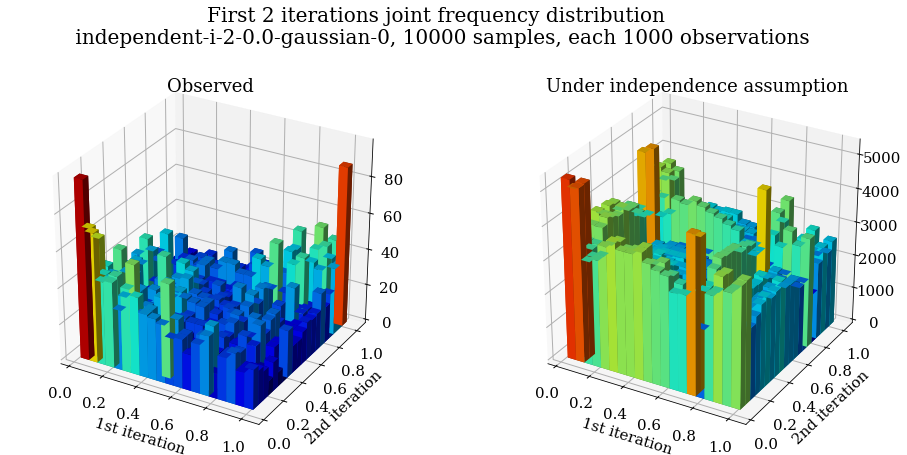

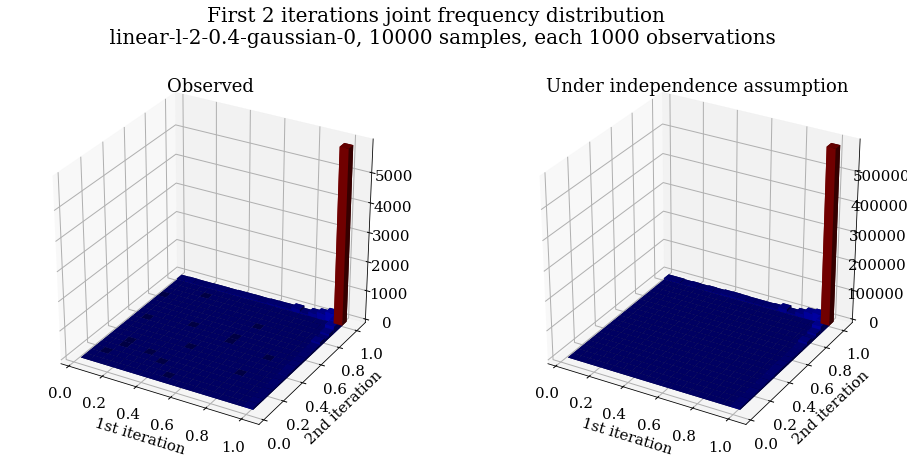

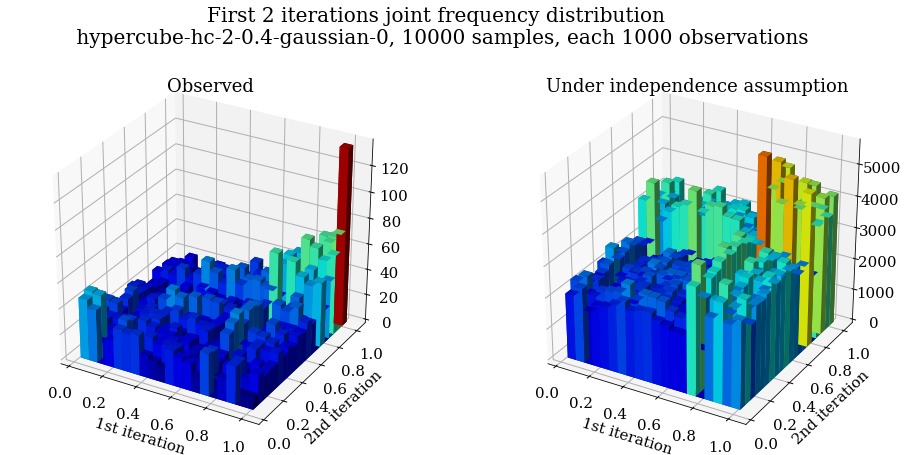

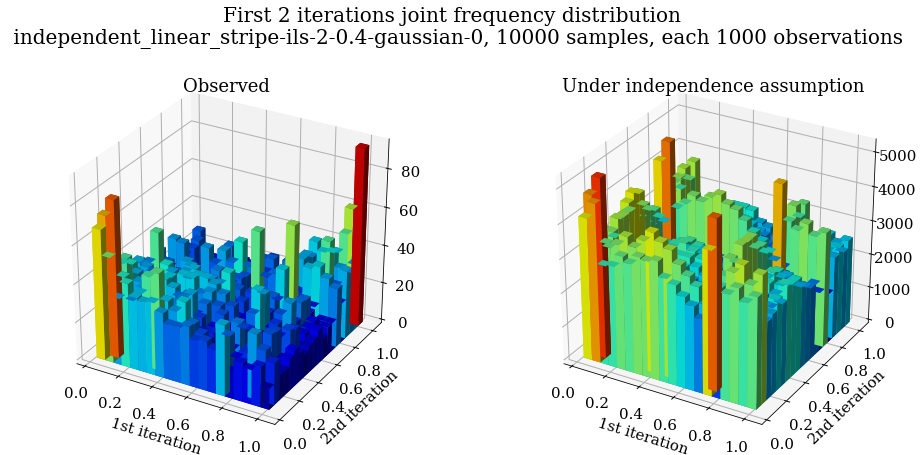

In [15]:
for genId in masterdata["genId"].unique():
  test_if_first_second_correlated(genId)